In [48]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

读入原始图片，使用一个通道，使其成为灰度图。

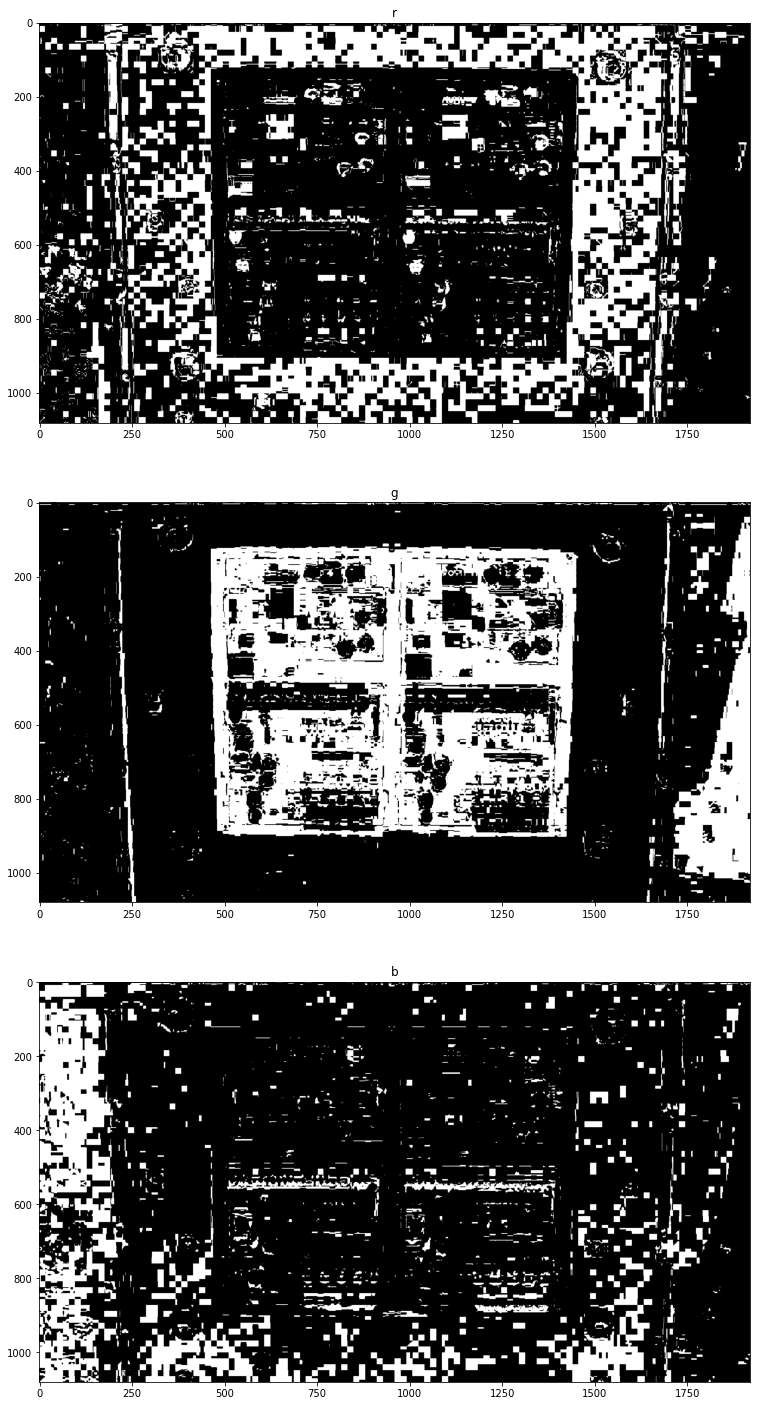

In [49]:
img_OK_path = r'D:\ENO\projects\THT check\tht-assembly-check\raw_images\lastCaptured.png'
sample_path = r'E:\lastCaptured.png'
img_OK_raw = cv2.imread(img_OK_path)  
img_sample = cv2.imread(sample_path)

def add_saturation(image, saturation):

    BASE_VALUE = 100
    hlsImg = cv2.cvtColor(image.astype(np.float32) / 255.0, cv2.COLOR_BGR2HLS) 
    # 饱和度
    hlsImg[:, :, 2] = (1.0 + saturation / float(BASE_VALUE)) * hlsImg[:, :, 2]
    hlsImg[:, :, 2][hlsImg[:, :, 2] > 1] = 1
    # HLS2BGR
    lsImg = cv2.cvtColor(hlsImg, cv2.COLOR_HLS2BGR) * 255
    lsImg = lsImg.astype(np.uint8)
    return lsImg

def image_from_one_channel(image_bgr,selected_channel):
    image_gray_of_one_channel = np.zeros_like(image_bgr)
    channel_b, channel_g, channel_r = cv2.split(image_bgr)
    channel_dict ={'r':channel_r,'g':channel_g,'b':channel_b}
    image_gray_of_one_channel[:, :, 0] = channel_dict[selected_channel]
    image_gray_of_one_channel[:, :, 1] = channel_dict[selected_channel]
    image_gray_of_one_channel[:, :, 2] = channel_dict[selected_channel]
    return image_gray_of_one_channel

def image_from_hsv_channel(img_bgr, selected_channel):

    colors = {'r': 0, 'g': 60, 'b': 120}
    channel = selected_channel
    color_hue = colors[channel]
    lower_color = np.array([color_hue - 20, 0, 0])
    upper_color = np.array([color_hue + 20, 255, 255])

    hsv_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    if channel != 'r':
        color_mask = cv2.inRange(hsv_image, lower_color, upper_color)
    else:
        color_mask_1 = cv2.inRange(hsv_image, lower_color, upper_color)
        color_hue = 180
        lower = np.array([color_hue - 20, 0, 0])
        upper = np.array([color_hue + 20, 255, 255])
        color_mask_2 = cv2.inRange(hsv_image, lower_color, upper_color)
        color_mask = color_mask_1 + color_mask_2
    return color_mask

plt.figure(figsize=(25,25))
plt.tight_layout()
ax = plt.subplot(3,1,1)
ax.set_title('r')
plt.imshow(image_from_hsv_channel(img_OK_raw,'r'),cmap='gray')
ax = plt.subplot(3,1,2)
ax.set_title('g')
plt.imshow(image_from_hsv_channel(img_OK_raw,'g'),cmap='gray')
ax = plt.subplot(3,1,3)
ax.set_title('b')
plt.imshow(image_from_hsv_channel(img_OK_raw,'b'),cmap='gray')

In [50]:
# diff_r = cv2.absdiff(image_from_hsv_channel(img_OK_raw,'r'), image_from_hsv_channel(img_sample,'r'))
# diff_g = cv2.absdiff(image_from_hsv_channel(img_OK_raw,'g'), image_from_hsv_channel(img_sample,'g'))
# diff_b = cv2.absdiff(image_from_hsv_channel(img_OK_raw,'b'), image_from_hsv_channel(img_sample,'b'))


# plt.figure(figsize=(25,25))
# plt.tight_layout()
# ax = plt.subplot(3,1,1)
# ax.set_title('r')
# plt.imshow(diff_r,cmap='gray')
# ax = plt.subplot(3,1,2)
# ax.set_title('g')
# plt.imshow(diff_g,cmap='gray')
# ax = plt.subplot(3,1,3)
# ax.set_title('b')
# plt.imshow(diff_b,cmap='gray')

In [51]:
# diff_r = cv2.absdiff(image_from_one_channel(img_OK_raw,'r'), image_from_one_channel(img_sample,'r'))
# diff_g = cv2.absdiff(image_from_one_channel(img_OK_raw,'g'), image_from_one_channel(img_sample,'g'))
# diff_b = cv2.absdiff(image_from_one_channel(img_OK_raw,'b'), image_from_one_channel(img_sample,'b'))


# plt.figure(figsize=(25,25))
# plt.tight_layout()
# ax = plt.subplot(3,1,1)
# ax.set_title('r')
# plt.imshow(diff_r,cmap='gray')
# ax = plt.subplot(3,1,2)
# ax.set_title('g')
# plt.imshow(diff_g,cmap='gray')
# ax = plt.subplot(3,1,3)
# ax.set_title('b')
# plt.imshow(diff_b,cmap='gray')

found 1 countors
757356.5
(4387, 1, 2)


<Figure size 1440x1440 with 0 Axes>

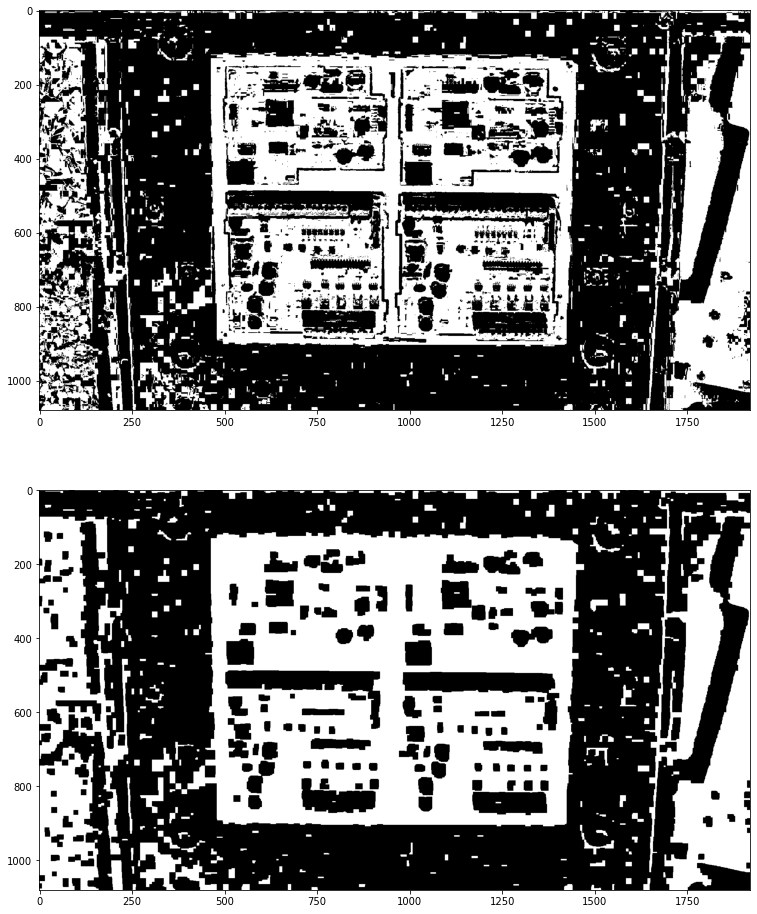

In [52]:
plt.figure(figsize=(20,20))
hsv_image = cv2.cvtColor(img_OK_raw, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([45, 20, 0])
upper_blue = np.array([150, 150, 255])
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(img_OK_raw, img_OK_raw, mask=mask)
hsv_thres = cv2.adaptiveThreshold(cv2.cvtColor(res, cv2.COLOR_BGR2GRAY), 255,
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 301, 0)

plt.figure(figsize=(25,25))
ax = plt.subplot(3,1,1)
plt.imshow(hsv_thres ,cmap='gray')

kernel_for_opening = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
kernel_for_closing = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
open_gray = cv2.morphologyEx(hsv_thres, cv2.MORPH_OPEN, kernel_for_opening, iterations=1)
close_gray = cv2.morphologyEx(open_gray, cv2.MORPH_CLOSE, kernel_for_closing, iterations=3)
# MIN_AREA = int(self.config['minimum_size_of_pcb_area'])
MIN_AREA = 500000
ax = plt.subplot(3,1,2)
plt.imshow(close_gray, cmap='gray')
(contours, _) = cv2.findContours(close_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
img_OK_raw = cv2.cvtColor(img_OK_raw, cv2.COLOR_BGR2RGB)
contours = [contour for contour in contours if cv2.contourArea(contour) > MIN_AREA]
print(f'found {len(contours)} countors')
for contour in contours:
    print(cv2.contourArea(contour))
my_single_contour = contours[0]
print(my_single_contour.shape)
# peri = cv2.arcLength(my_single_contour, True)
# appr_pre = cv2.approxPolyDP(my_single_contour, 0.05 * peri, True)
# my_single_contour = appr_pre

(upper_left_x, upper_left_y) = my_single_contour.reshape(-1, 2).min(0)
(lower_right_x, lower_right_y) = my_single_contour.reshape(-1, 2).max(0)
pcb_width = lower_right_x - upper_left_x
pcb_heigth = lower_right_y - upper_left_y
cavas_width = int(pcb_width*1.1)
cavas_height = int(pcb_heigth*1.1)
canvas = 0 * np.ones(shape=[cavas_height, cavas_width, 3], dtype=np.uint8)
canvas[0:pcb_heigth, 0:pcb_width, :] = img_OK_raw[upper_left_y:lower_right_y, upper_left_x:lower_right_x, :]
# plt.imshow(open_gray, cmap='gray')
plt.imshow(close_gray, cmap='gray')
# plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2GRAY),cmap='gray')


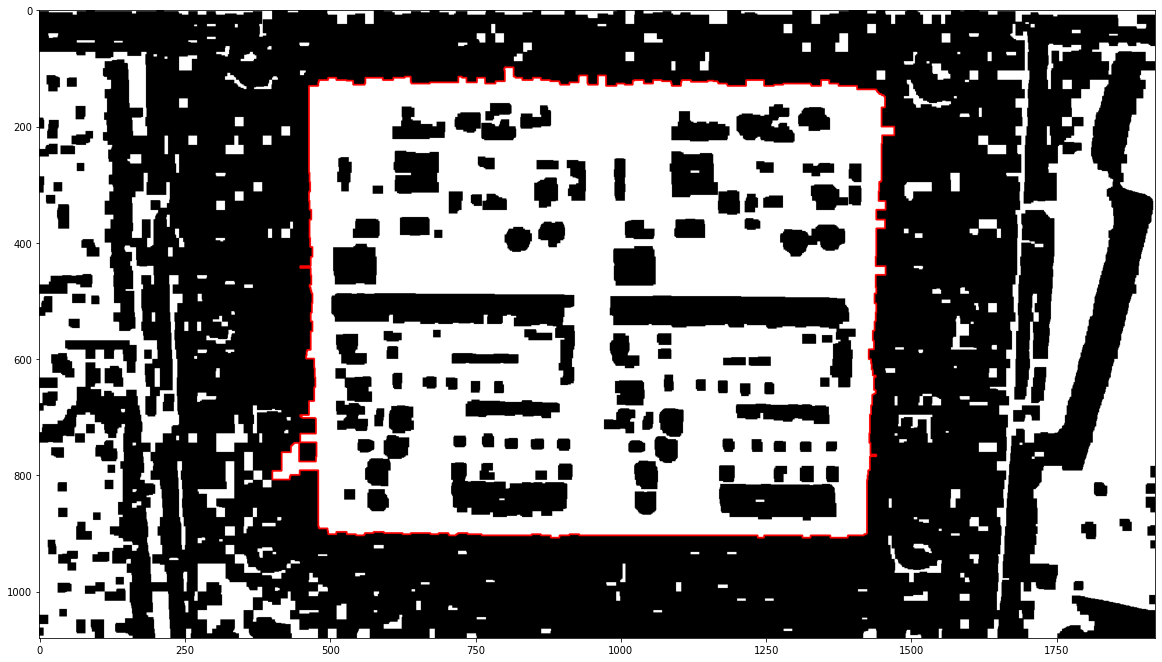

In [53]:
plt.figure(figsize=(20,20))

color_close_gray = cv2.cvtColor(close_gray, cv2.COLOR_GRAY2RGB)
img_drawing = np.copy(color_close_gray)
img_drawing = cv2.drawContours(img_drawing, [my_single_contour], 0, (255,0,0), 2)
plt.imshow(img_drawing)


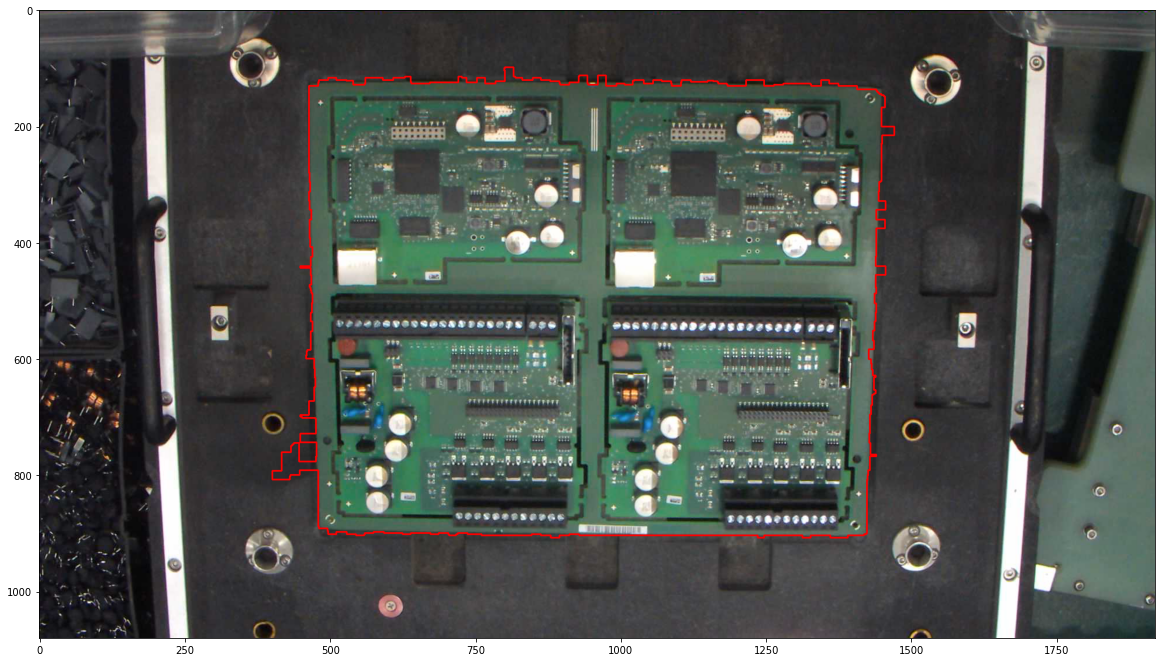

In [54]:
plt.figure(figsize=(20,20))

img_drawing = np.copy(img_OK_raw)
img_drawing = cv2.drawContours(img_drawing, [my_single_contour], 0, (255,0,0), 2)
plt.imshow(img_drawing)

看看HSV

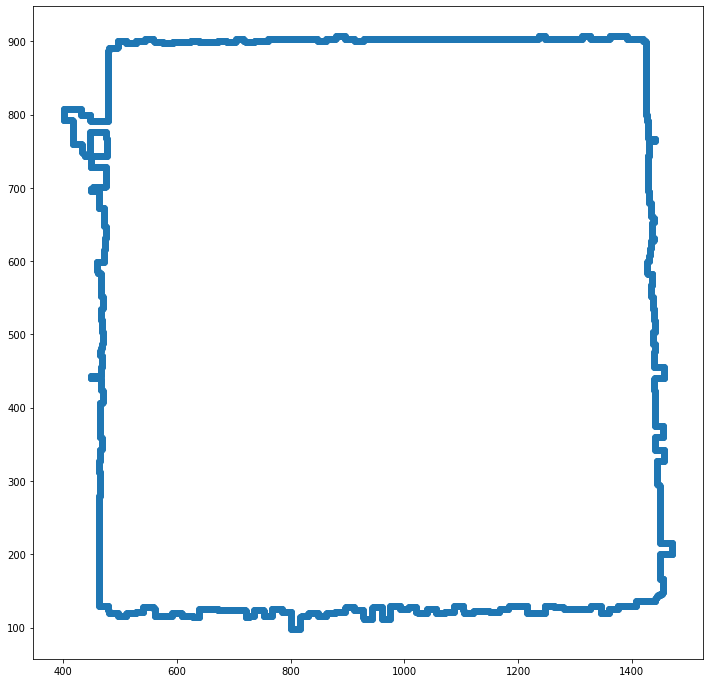

In [55]:
points = []
for item in my_single_contour:
    points.append(item[0])
points = np.array(points)
x_axis = points[:, 0]
y_axis = points[:, 1]

plt.figure(figsize=(12,12))
plt.scatter(x_axis, y_axis)
plt.show()

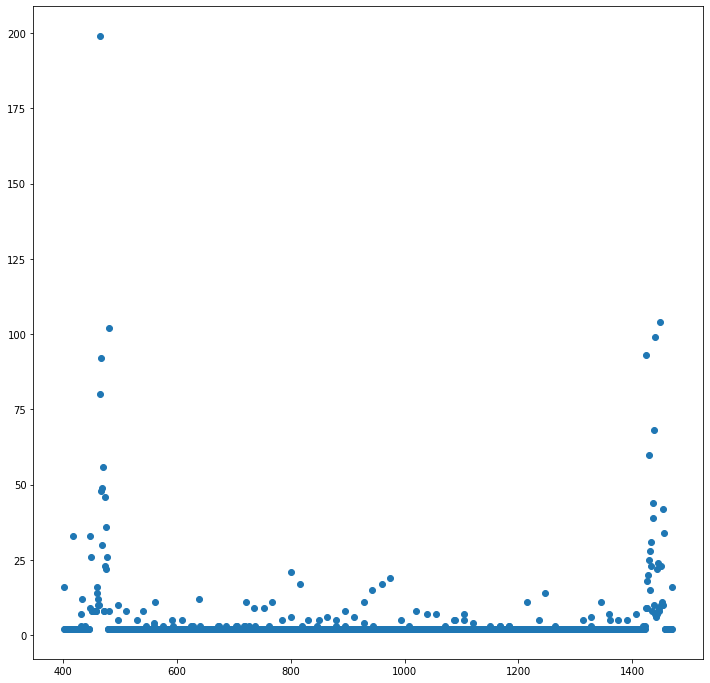

337 464


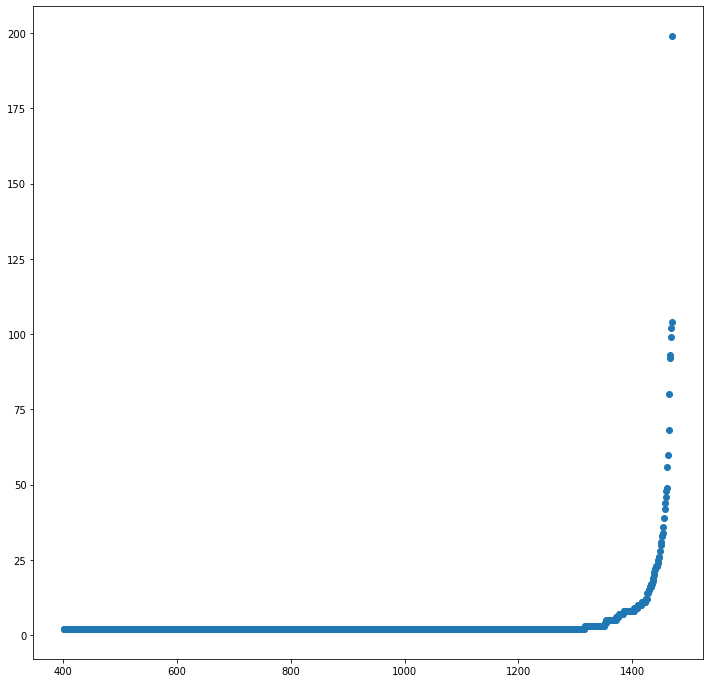

In [56]:
x_value_counts = {}
for x_value in x_axis:
    if x_value in x_value_counts:
        x_value_counts[x_value] += 1
    else:
        x_value_counts[x_value] = 1
draw_points = []
for key in x_value_counts:
    draw_points.append((key, x_value_counts[key]))
draw_points = np.array(draw_points)

plt.figure(figsize=(12,12))
plt.scatter(draw_points[:, 0], draw_points[:, 1])
plt.show()

max1 = np.argmax(draw_points[:, 1])
print(max1, draw_points[max1][0])
draw_points_sorted = np.sort(draw_points, axis = 0)
plt.figure(figsize=(12,12))
plt.scatter(draw_points_sorted[:, 0], draw_points_sorted[:, 1])
plt.show()

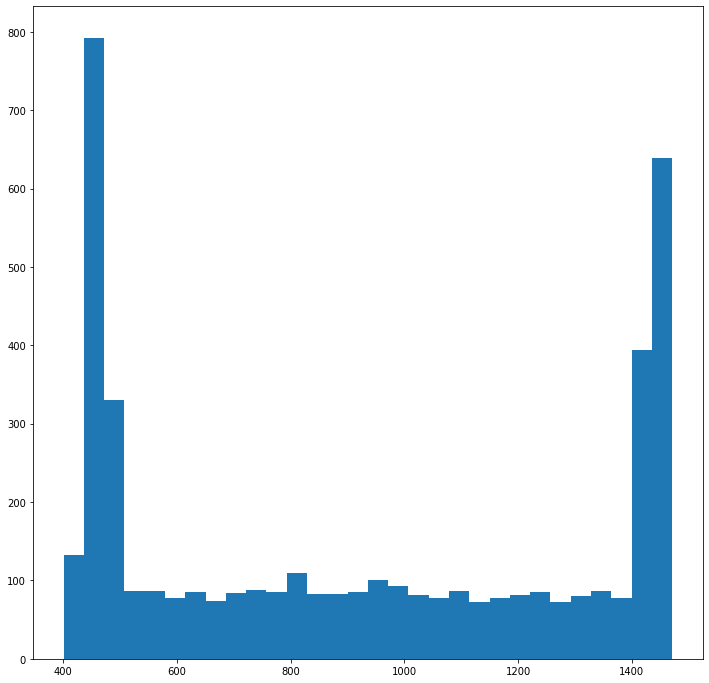

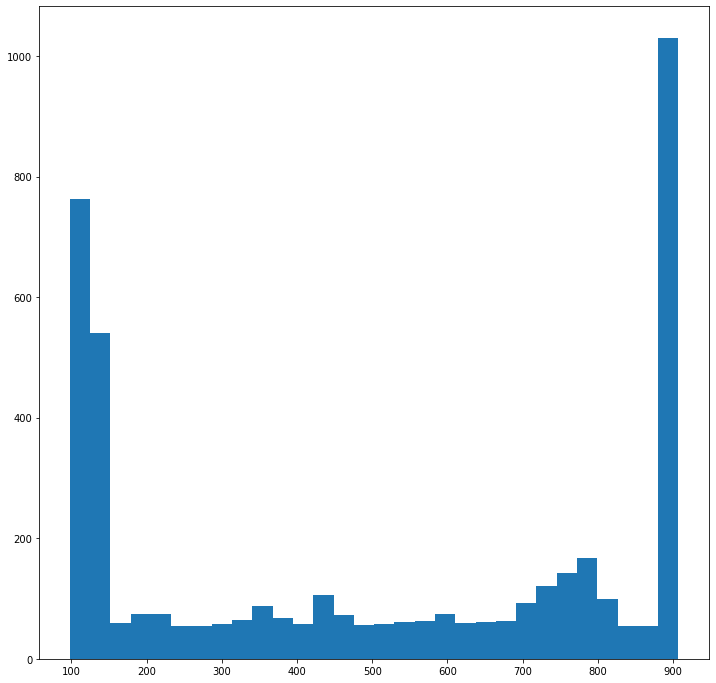

In [57]:
def get_interval_by_axis(axis_points, bins=30):
    plt.figure(figsize=(12,12))
    n, bins, _ = plt.hist(axis_points, bins=bins)
    sort_indices = np.argsort(n)
    bar_delta = bins[1] - bins[0]
    bar_1 = (bins[0] + sort_indices[-1] * bar_delta, bins[0] + (sort_indices[-1] + 1) * bar_delta)
    bar_2 = (bins[0] + sort_indices[-2] * bar_delta, bins[0] + (sort_indices[-2] + 1) * bar_delta)
    max_bars = (  bar_1 ,  bar_2  )
    return max_bars

x_intervals = get_interval_by_axis(x_axis)
y_intervals = get_interval_by_axis(y_axis)

plt.show()

((436.6666666666667, 472.33333333333337), (1435.333333333334, 1471.0000000000005)) ((880.0333333333334, 907.0), (98.0, 124.96666666666667))


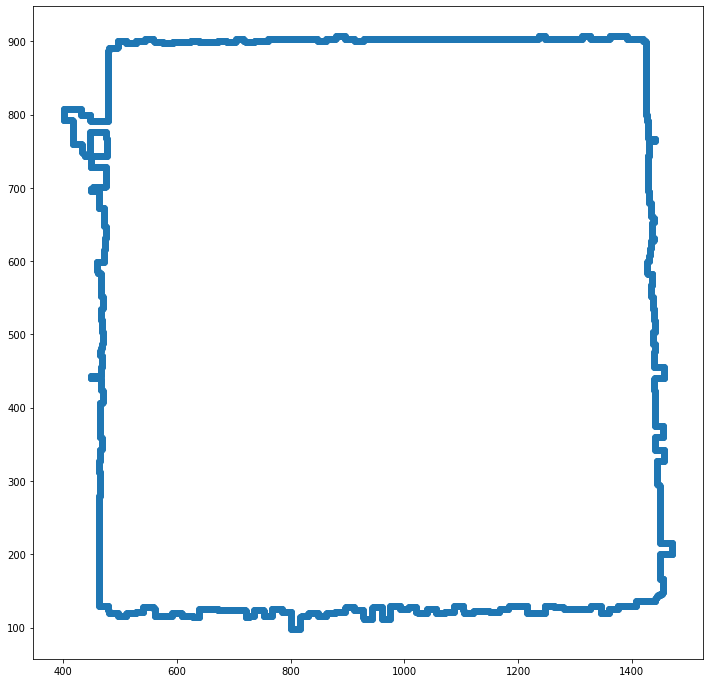

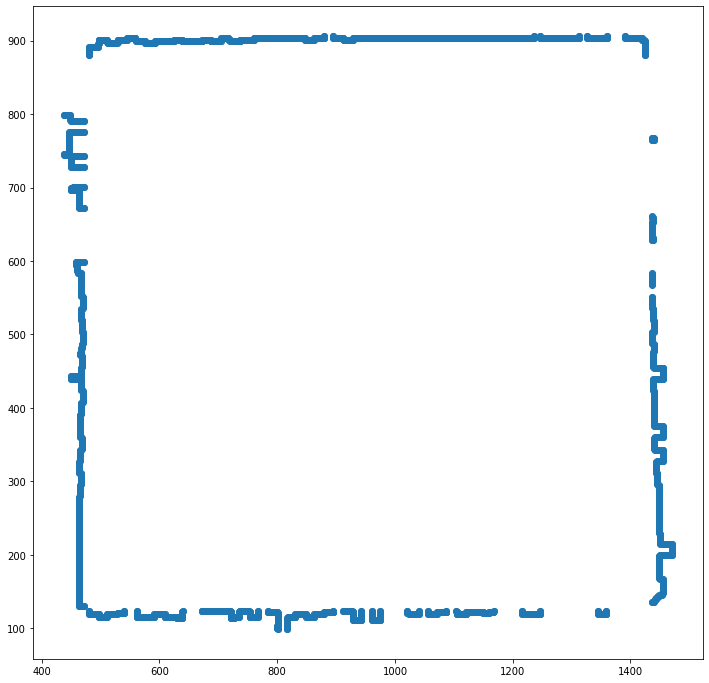

In [58]:
print(x_intervals, y_intervals)

def filter_contour_by_intervals(points, x_intervals, y_intervals):
    filtered_points = []
    for point in points:
        if   (point[0] > x_intervals[0][0] and point[0] < x_intervals[0][1]) or (point[0] > x_intervals[1][0] and point[0] < x_intervals[1][1]):
            if (point[1] > y_intervals[0][1] and point[1] > y_intervals[1][1]) or (point[1] < y_intervals[0][0] and point[1] < y_intervals[1][0]):
                continue
            else:
                filtered_points.append(point)
        elif (point[1] > y_intervals[0][0] and point[1] < y_intervals[0][1]) or (point[1] > y_intervals[1][0] and point[1] < y_intervals[1][1]):
            if (point[0] > x_intervals[0][1] and point[0] > x_intervals[1][1]) or (point[0] < x_intervals[0][0] and point[0] < x_intervals[1][0]):
                continue
            else:
                filtered_points.append(point)

            filtered_points.append(point)
    return np.array(filtered_points)

filtered_points = filter_contour_by_intervals(points, x_intervals, y_intervals)

x_axis = points[:, 0]
y_axis = points[:, 1]
plt.figure(figsize=(12,12))
plt.scatter(x_axis, y_axis)
plt.show()


x_axis = filtered_points[:, 0]
y_axis = filtered_points[:, 1]
plt.figure(figsize=(12,12))
plt.scatter(x_axis, y_axis)
plt.show()

In [59]:
my_filtered_contour = []
for point in filtered_points:
    my_filtered_contour.append([point])
my_filtered_contour = np.array(my_filtered_contour)
print(my_single_contour.shape)
print(my_filtered_contour.shape)

(4387, 1, 2)
(4840, 1, 2)


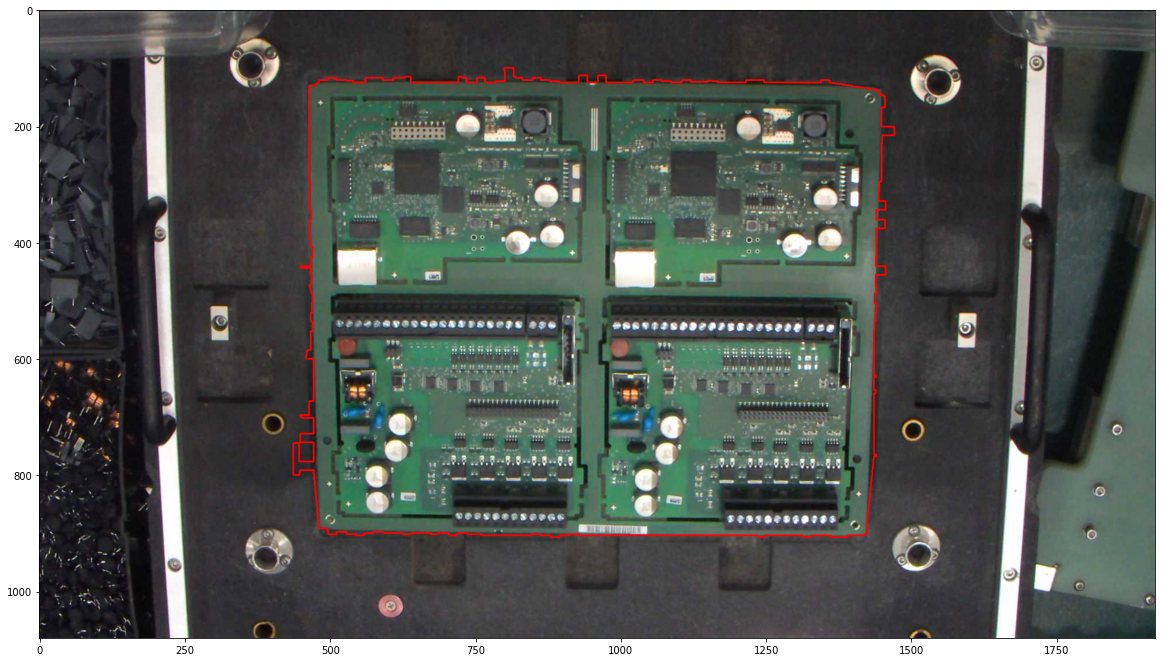

In [60]:
plt.figure(figsize=(20,20))

img_drawing = np.copy(img_OK_raw)
img_drawing = cv2.drawContours(img_drawing, [my_filtered_contour], 0, (255,0, 0), 2)
plt.imshow(img_drawing)

True

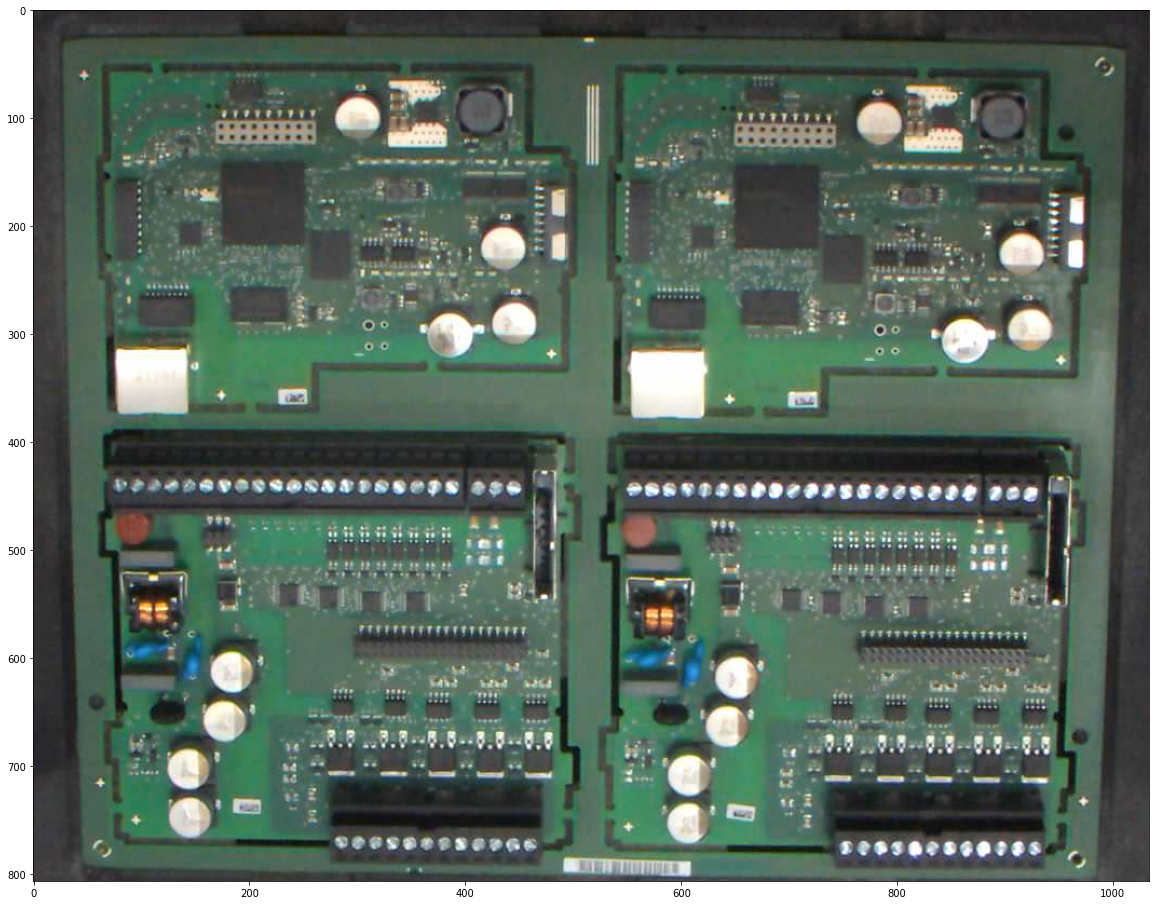

In [61]:
(upper_left_x,upper_left_y) = my_filtered_contour.reshape(-1,2).min(0)
(lower_right_x,lower_right_y) = my_filtered_contour.reshape(-1,2).max(0)
width = lower_right_x - upper_left_x
heigth = lower_right_y - upper_left_y
canvas = 0 * np.ones(shape=[heigth, width, 3], dtype=np.uint8)
canvas[0:heigth,0:width,:]=img_OK_raw[upper_left_y:lower_right_y,upper_left_x:lower_right_x,:]

plt.figure(figsize=(20,20))
plt.tight_layout()
plt.imshow(canvas)

cv2.imwrite('canvas_showcase_1.png', cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))

In [62]:
def filter_contour(contour):
    
    # Unpack points from contour
    points = [item[0] for item in contour]
    # Convert points to np arrays
    points = np.array(points)
    # Get list of coordinates of each axis
    x_axis = points[:, 0]
    y_axis = points[:, 1]

    # Compute and get the two intervals that contain the most coordinates
    def get_interval_by_axis(axis_points, bins=50):
        n, bins, _ = plt.hist(axis_points, bins=bins)
        sort_indices = np.argsort(n)
        bar_delta = bins[1] - bins[0]
        bar_1 = (bins[0] + sort_indices[-1] * bar_delta, bins[0] + (sort_indices[-1] + 1) * bar_delta)
        bar_2 = (bins[0] + sort_indices[-2] * bar_delta, bins[0] + (sort_indices[-2] + 1) * bar_delta)
        max_bars = (  bar_1 ,  bar_2  )
        return max_bars

    # Get the intervals for both axis
    x_intervals = get_interval_by_axis(x_axis)
    y_intervals = get_interval_by_axis(y_axis)

    # Filter the contour points by the intervals
    def filter_contour_by_intervals(points, x_intervals, y_intervals):
        filtered_points = []
        for point in points:
            # If x-coordinate of point is inside any of the x intervals, and y-coordinate of that point does not exceed minumum and maximum of both y intervals
            if   (point[0] > x_intervals[0][0] and point[0] < x_intervals[0][1]) or (point[0] > x_intervals[1][0] and point[0] < x_intervals[1][1]):
                if (point[1] > y_intervals[0][1] and point[1] > y_intervals[1][1]) or (point[1] < y_intervals[0][0] and point[1] < y_intervals[1][0]):
                    continue
                else:
                    filtered_points.append(point)
            # If y-coordinate of point is inside any of the y intervals, and x-coordinate of that point does not exceed minumum and maximum of both x intervals
            elif (point[1] > y_intervals[0][0] and point[1] < y_intervals[0][1]) or (point[1] > y_intervals[1][0] and point[1] < y_intervals[1][1]):
                if (point[0] > x_intervals[0][1] and point[0] > x_intervals[1][1]) or (point[0] < x_intervals[0][0] and point[0] < x_intervals[1][0]):
                    continue
                else:
                    filtered_points.append(point)
        return np.array(filtered_points)

    filtered_points = filter_contour_by_intervals(points, x_intervals, y_intervals)

    # Zip the points into the format of contour points
    filtered_contour = [ [point] for point in filtered_points]
    filtered_contour = np.array(filtered_contour)

    return filtered_contour

(4387, 1, 2)
(4274, 1, 2)


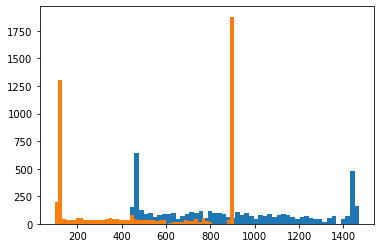

In [63]:
print(my_single_contour.shape)
print(filter_contour(my_filtered_contour).shape)

In [64]:
def automatic_brightness_and_contrast(image, clip_hist_percent=5):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)

    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))

    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0

    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1

    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1

    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha

    '''
    # Calculate new histogram with desired range and show histogram 
    new_hist = cv2.calcHist([gray],[0],None,[256],[minimum_gray,maximum_gray])
    plt.plot(hist)
    plt.plot(new_hist)
    plt.xlim([0,256])
    plt.show()
    '''
    
    auto_result = cv2.convertScaleAbs(cv2.cvtColor(image, cv2.COLOR_RGB2BGR), alpha=alpha, beta=beta)
    auto_result = cv2.cvtColor(auto_result, cv2.COLOR_BGR2RGB)
    return auto_result

In [65]:
# Try automatically converting brightness and contrast. Ending up not being used in final version.
converted_img = automatic_brightness_and_contrast(canvas)

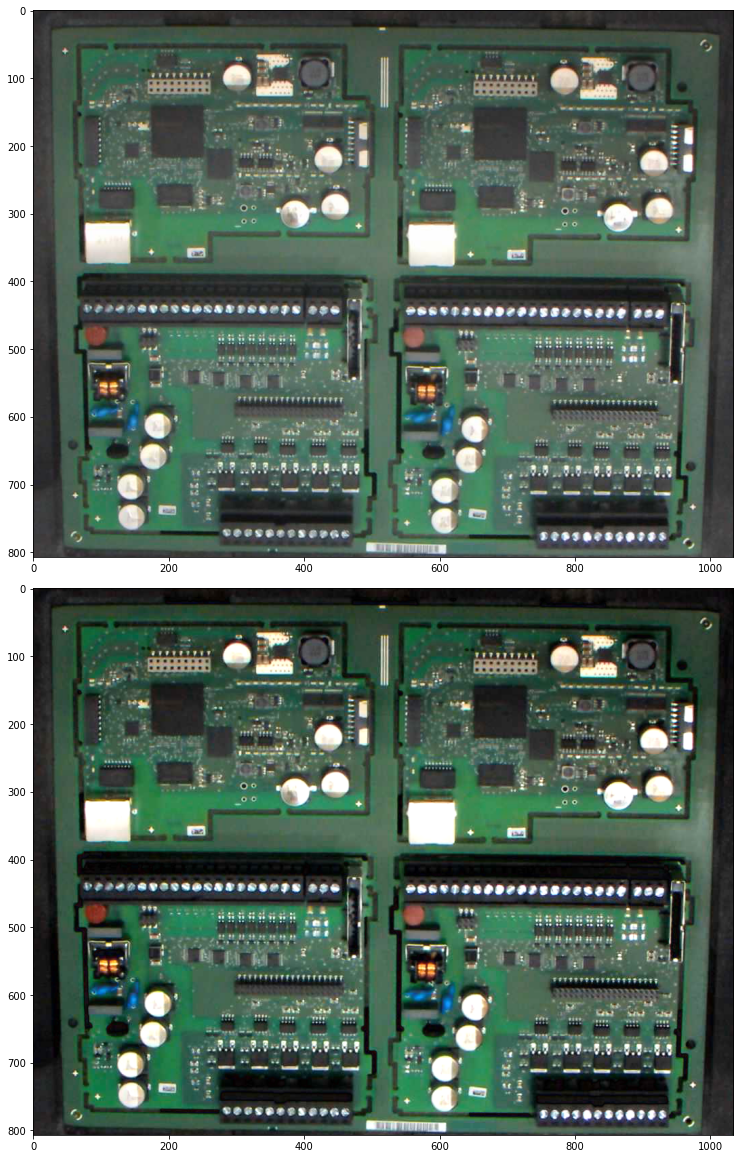

In [66]:
plt.figure(figsize=(24,24))
ax = plt.subplot(3,1,1)
plt.tight_layout()
plt.imshow(canvas)
ax = plt.subplot(3,1,2)
plt.tight_layout()
plt.imshow(converted_img)


In [67]:
# image_saturated = canvas.copy()
# box_upper_left = [500, 470]
# box_lower_right = [550, 490]
# # box_upper_left = [550, 470]
# # box_lower_right = [580, 490]
# box_slice_image = image_saturated[box_upper_left[1]:box_lower_right[1], box_upper_left[0]:box_lower_right[0], :]

In [68]:
# plt.imshow(box_slice_image)

In [69]:
# abs_diffs = []
# for line in box_slice_image:
#     for pix in line:
#         r, g, b = pix
#         r, g, b = int(r), int(g), int(b)
#         abs_diff = abs(r - g) + abs(r - b) + abs(g - b)
#         abs_diffs.append(abs_diff)
# all_pix = len(abs_diffs)
# gray_pix = len(np.where(np.array(abs_diffs) < 180)[0])
# print(all_pix, gray_pix, (all_pix - gray_pix) / all_pix)
# # print()
# # np.where(np.array(abs_diffs) < 50)[0]